In [1]:
import matplotlib.pyplot as plt
from scipy.special import hyp2f1
import numpy as np
#Key reference https://cds.cern.ch/record/475665/files/0011109.pdf

Constants' sections

In [52]:
sigma_m0, sigma_q0, alpha, alpha_x, m = [0.5,.5,0,1,0]
beta= ((25-24*alpha)**.5)/4
a, b=5/4+beta, 5/4-beta
c=1/2
z_0 = 0 #Starting point
print(a,b,c)

2.5 0.0 0.5


Interval of interest

In [53]:
#Starting point
z_1=0
z_2=10

Integration parameters

In [54]:
h=0.0001 #Length of steps
N=int(z_2/h) #Number of steps
print(N)

100000


Useful functions

In [55]:
def f_1(z):
    """
    This function multiplies the second order derivative in the
    Dyer-Roeder equation.
    """
    return sigma_m0*z+1+sigma_q0*(1+z)**(m-2)*(1-1/(1+z)**(m-2))

def f_2(z):
    """
    This function multiplies the first order derivative in the
    Dyer-Roeder equation.
    """
    return (7*sigma_m0*z/2+sigma_m0/2+3+sigma_q0*(1+z)**(m-2)*\
            ((m+4)/2-3/(1+z)**(m-2)))/(1+z)
def f_3(z):
    """
    This function multiplies the function r(z) in the
    Dyer-Roeder equation.
    """
    return (3/(2*(1+z)**4))*(alpha*sigma_m0*(1+z)**3+alpha_x*m/3*\
            sigma_q0*(1+z)**m)
def F(z,r,v):
    """
    This function is obtained clearing the second derivative of r(z)
    in the Dyer-Roeder equation.
    """
    return -(f_2(z)*v+f_3(z)*r)/f_1(z)

def flat_universe(z):
    r_list = [ ]
    for ii in z:
        r_list.append(2*(1-1/(1+ii)**(5/2.))/5)
    return r_list

def beta_func(z):
    r_list = [ ]
    for ii in z:
        r_list.append(((1+ii)**beta-(1+ii)**(-beta))/(2*beta*(1+ii)**(5/4)))
    return r_list
def hypergeometric(z):
    r_list=[]
    aa=hyp2f1(-1/3,1/2,2/3, sigma_m0/(sigma_m0-1))
    for ii in z:
        r_list.append((aa-hyp2f1(-1/3,1/2,2/3, sigma_m0*(1+ii)**3/(sigma_m0-1))/(1+ii))/(1-sigma_m0)**.5)
        #r_list.append(2/((m-2)*(1-sigma_m0)**.5)*(1/(1+ii)*hyp2f1((m-2)/(2*(m-3)), 1/2, (3*m-8)/(2*(m-3)),\
        #sigma_m0/(sigma_m0-1))-hyp2f1((m-2)/(2*(m-3)), 1/2, (3*m-8)/(2*(m-3))\
        #, sigma_m0/(sigma_m0-1)*(1+ii)**3)/(1+ii)**(m/2)))
    return r_list

def alpha_1(z):
    r_list=[]
    for ii in z:
        r_list.append(2*(sigma_m0*ii-(2-sigma_m0)*((sigma_m0*ii+1)**.5-1))/(sigma_m0**2*(1+ii)**2))
    return r_list

Initial conditions

In [56]:
r_0 = 0
v_0 = 1/((1+z_0)**2*(sigma_m0*z_0+1+sigma_q0*(1+z_0)**(m-2)*\
        (1-1/(1+z_0)**(m-2)))**.5)

Numeric Integration zone

In [57]:
r = [r_0]
v = [v_0]
z = z_0
z_array = [z_0]
for ii in range(N):
    #Runge Kutta Fourth Order
    r.append(r[-1]+h*v[-1])

    k1 = F(z, r[-1], v[-1])
    k2 = F(z+h/2, r[-1], v[-1]+k1*h/2)
    k3 = F(z+h/2, r[-1], v[-1]+k2*h/2)
    k4 = F(z+h, r[-1], v[-1]+k3*h)

    v.append(v[-1]+h*(k1+2*k2+2*k3+k4)/6)
    z += h
    z_array.append(z)


Graphics' zone

In [58]:
string = r"$\Omega_{m_0} = %1.2f$"%sigma_m0+"\n"+r"$\Omega_{Q_0} = %1.2f$"%sigma_q0+"\n"+r"$\overline{\alpha} = %1.2f$"%alpha+"\n"+r"$\overline{\alpha_x} = %1.2f$"%alpha_x+"\n"+r"$m=%1.2f$"%m+"\n"+r"$z_0 = %1.2f$"%z_0


/home/julian/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.


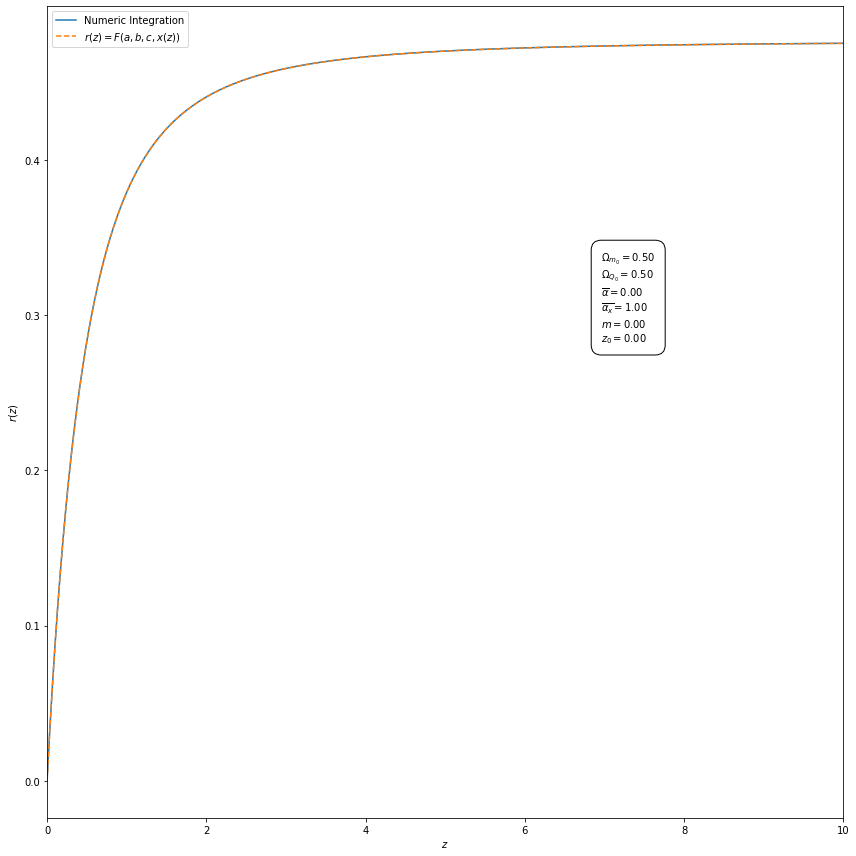

In [59]:
f=plt.figure(figsize=(12,12))
plt.plot(z_array, r, label="Numeric Integration")
plt.plot(z_array, hypergeometric(z_array), "--",label=r"$r(z)=F(a,b,c,x(z))$")
"""
List:
r(z)=\frac{2}{5}\left(1-\frac{1}{(1+z)^{5/2}} \right)
r(z)=\frac{(1+z)^\beta-(1+z)^{-\beta}}{2\beta(1+z)^{5/4}}
r(z)=F(a,b,c,x(z))
r(z)=\frac{2}{\Omega^{2}(1+z)^{2}}[\Omega z-(2-\Omega)(\sqrt{\Omega z+1}-1)]
"""
plt.xlabel(r"$z$")
plt.ylabel(r"$r(z)$")
plt.text(0.7, 0.60, string, fontsize=10, transform=plt.gcf().transFigure,
bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
plt.legend()
plt.xlim(z_1,z_2)
plt.tight_layout()
plt.show()

Test zone

In [24]:
print()

In [25]:
z_arr=np.array(z_array)
z_arr

array([0.000e+00, 1.000e-03, 2.000e-03, ..., 4.998e+00, 4.999e+00,
       5.000e+00])

In [33]:
for x in z_arr:
    print(hyp2f1(a,b,c,(1+sigma_m0*x)/(1-sigma_m0)))

(0.558853858040593 - 0.225863383608489j)
(0.55876457091546 - 0.22584531284701j)
(0.558675465167796 - 0.225827255195063j)
(0.558586540121057 - 0.225809210634494j)
(0.558497795102071 - 0.225791179147187j)
(0.558409229441022 - 0.225773160715064j)
(0.558320842471428 - 0.225755155320083j)
(0.558232633530119 - 0.225737162944238j)
(0.558144601957219 - 0.225719183569563j)
(0.558056747096127 - 0.225701217178124j)
(0.557969068293494 - 0.225683263752029j)
(0.557881564899205 - 0.225665323273419j)
(0.557794236266362 - 0.225647395724472j)
(0.557707081751259 - 0.225629481087402j)
(0.557620100713369 - 0.225611579344462j)
(0.557533292515321 - 0.225593690477937j)
(0.557446656522882 - 0.225575814470152j)
(0.557360192104938 - 0.225557951303464j)
(0.557273898633476 - 0.22554010096027j)
(0.557187775483564 - 0.225522263422999j)
(0.557101822033336 - 0.225504438674119j)
(0.557016037663968 - 0.225486626696131j)
(0.556930421759667 - 0.225468827471573j)
(0.556844973707646 - 0.225451040983016j)
(0.55675969289811 -

(0.532837266136192 - 0.219521266923973j)
(0.532788588902958 - 0.21950730169718j)
(0.532739966782484 - 0.219493344490256j)
(0.532691399644578 - 0.219479395294433j)
(0.532642887359489 - 0.219465454100958j)
(0.532594429797907 - 0.21945152090109j)
(0.532546026830957 - 0.219437595686104j)
(0.532497678330204 - 0.219423678447289j)
(0.532449384167644 - 0.219409769175946j)
(0.532401144215708 - 0.219395867863393j)
(0.532352958347256 - 0.21938197450096j)
(0.532304826435578 - 0.219368089079992j)
(0.53225674835439 - 0.219354211591846j)
(0.532208723977833 - 0.219340342027895j)
(0.532160753180473 - 0.219326480379527j)
(0.532112835837296 - 0.219312626638139j)
(0.532064971823709 - 0.219298780795147j)
(0.532017161015536 - 0.219284942841979j)
(0.531969403289019 - 0.219271112770075j)
(0.531921698520812 - 0.21925729057089j)
(0.531874046587984 - 0.219243476235895j)
(0.531826447368014 - 0.21922966975657j)
(0.531778900738791 - 0.219215871124414j)
(0.531731406578612 - 0.219202080330934j)
(0.531683964766177 - 0

(0.52295192709916 - 0.216529059254885j)
(0.522913139777619 - 0.216516720323648j)
(0.522874386474535 - 0.21650438772862j)
(0.52283566712562 - 0.216492061463612j)
(0.52279698166677 - 0.216479741522446j)
(0.522758330034059 - 0.21646742789895j)
(0.522719712163739 - 0.216455120586964j)
(0.522681127992244 - 0.216442819580336j)
(0.522642577456185 - 0.216430524872922j)
(0.52260406049235 - 0.216418236458588j)
(0.522565577037703 - 0.216405954331208j)
(0.522527127029388 - 0.216393678484666j)
(0.52248871040472 - 0.216381408912852j)
(0.522450327101192 - 0.216369145609668j)
(0.52241197705647 - 0.216356888569024j)
(0.522373660208396 - 0.216344637784836j)
(0.522335376494982 - 0.216332393251034j)
(0.522297125854415 - 0.216320154961551j)
(0.522258908225053 - 0.216307922910332j)
(0.522220723545424 - 0.216295697091331j)
(0.52218257175423 - 0.216283477498508j)
(0.522144452790339 - 0.216271264125835j)
(0.522106366592792 - 0.216259056967291j)
(0.522068313100798 - 0.216246856016862j)
(0.522030292253732 - 0.21

(0.515467706951477 - 0.214068168871086j)
(0.515434884348676 - 0.214057037116525j)
(0.515402085424473 - 0.214045910571611j)
(0.515369310141644 - 0.214034789231712j)
(0.515336558463057 - 0.2140236730922j)
(0.515303830351667 - 0.214012562148456j)
(0.515271125770519 - 0.214001456395863j)
(0.515238444682744 - 0.213990355829813j)
(0.515205787051564 - 0.213979260445704j)
(0.515173152840289 - 0.213968170238938j)
(0.515140542012314 - 0.213957085204925j)
(0.515107954531124 - 0.213946005339081j)
(0.51507539036029 - 0.213934930636825j)
(0.51504284946347 - 0.213923861093587j)
(0.515010331804408 - 0.213912796704799j)
(0.514977837346935 - 0.213901737465899j)
(0.514945366054969 - 0.213890683372335j)
(0.514912917892512 - 0.213879634419556j)
(0.514880492823652 - 0.21386859060302j)
(0.514848090812563 - 0.213857551918189j)
(0.514815711823503 - 0.213846518360534j)
(0.514783355820816 - 0.213835489925528j)
(0.514751022768929 - 0.213824466608652j)
(0.514718712632354 - 0.213813448405394j)
(0.514686425375687 - 

(0.508873144991061 - 0.211777503915249j)
(0.508844699407549 - 0.211767399091055j)
(0.508816271152679 - 0.211757298601381j)
(0.508787860203452 - 0.211747202442699j)
(0.508759466536916 - 0.211737110611481j)
(0.508731090130168 - 0.211727023104204j)
(0.50870273096035 - 0.21171693991735j)
(0.508674389004652 - 0.211706861047406j)
(0.508646064240312 - 0.211696786490862j)
(0.508617756644613 - 0.211686716244213j)
(0.508589466194885 - 0.211676650303956j)
(0.508561192868506 - 0.211666588666596j)
(0.508532936642899 - 0.211656531328639j)
(0.508504697495535 - 0.211646478286596j)
(0.508476475403929 - 0.211636429536983j)
(0.508448270345644 - 0.21162638507632j)
(0.508420082298288 - 0.21161634490113j)
(0.508391911239515 - 0.211606309007942j)
(0.508363757147025 - 0.211596277393287j)
(0.508335619998562 - 0.211586250053703j)
(0.508307499771919 - 0.211576226985728j)
(0.50827939644493 - 0.211566208185909j)
(0.508251309995478 - 0.211556193650793j)
(0.508223240401488 - 0.211546183376933j)
(0.508195187640932 - 

(0.503147305212291 - 0.209708511195703j)
(0.50312211060141 - 0.209699259797249j)
(0.503096929302212 - 0.209690012064653j)
(0.50307176129948 - 0.209680767995157j)
(0.503046606578024 - 0.209671527586008j)
(0.50302146512268 - 0.209662290834454j)
(0.502996336918313 - 0.209653057737749j)
(0.502971221949814 - 0.209643828293147j)
(0.502946120202102 - 0.209634602497907j)
(0.502921031660122 - 0.20962538034929j)
(0.502895956308846 - 0.20961616184456j)
(0.502870894133274 - 0.209606946980985j)
(0.502845845118433 - 0.209597735755836j)
(0.502820809249375 - 0.209588528166385j)
(0.502795786511181 - 0.209579324209909j)
(0.502770776888956 - 0.209570123883689j)
(0.502745780367835 - 0.209560927185005j)
(0.502720796932976 - 0.209551734111144j)
(0.502695826569566 - 0.209542544659394j)
(0.502670869262817 - 0.209533358827047j)
(0.502645924997969 - 0.209524176611397j)
(0.502620993760286 - 0.209514998009742j)
(0.50259607553506 - 0.209505823019382j)
(0.502571170307609 - 0.20949665163762j)
(0.502546278063276 - 0.

(0.497855715706165 - 0.207739951639575j)
(0.497833146487162 - 0.207731451526461j)
(0.49781058777118 - 0.207722954534891j)
(0.497788039547754 - 0.20771446066269j)
(0.497765501806437 - 0.207705969907685j)
(0.497742974536799 - 0.207697482267707j)
(0.497720457728425 - 0.207688997740587j)
(0.497697951370918 - 0.20768051632416j)
(0.497675455453896 - 0.207672038016262j)
(0.497652969966994 - 0.207663562814732j)
(0.497630494899864 - 0.207655090717411j)
(0.497608030242172 - 0.207646621722142j)
(0.497585575983604 - 0.207638155826771j)
(0.497563132113857 - 0.207629693029144j)
(0.49754069862265 - 0.207621233327113j)
(0.497518275499714 - 0.207612776718528j)
(0.497495862734796 - 0.207604323201245j)
(0.497473460317663 - 0.207595872773119j)
(0.497451068238094 - 0.207587425432009j)
(0.497428686485886 - 0.207578981175776j)
(0.497406315050851 - 0.207570540002283j)
(0.497383953922817 - 0.207562101909395j)
(0.49736160309163 - 0.207553666894979j)
(0.497339262547148 - 0.207545234956905j)
(0.497316932279248 - 

(0.493290810798723 - 0.20600451255881j)
(0.49327025744793 - 0.205996628842794j)
(0.49324971270275 - 0.205988747832927j)
(0.493229176555555 - 0.205980869527447j)
(0.49320864899873 - 0.205972993924595j)
(0.49318813002467 - 0.205965121022613j)
(0.493167619625781 - 0.205957250819744j)
(0.493147117794479 - 0.205949383314234j)
(0.49312662452319 - 0.20594151850433j)
(0.493106139804352 - 0.20593365638828j)
(0.493085663630414 - 0.205925796964334j)
(0.493065195993834 - 0.205917940230746j)
(0.493044736887082 - 0.205910086185768j)
(0.493024286302637 - 0.205902234827656j)
(0.493003844232989 - 0.205894386154667j)
(0.492983410670641 - 0.205886540165059j)
(0.492962985608102 - 0.205878696857094j)
(0.492942569037896 - 0.205870856229033j)
(0.492922160952553 - 0.205863018279139j)
(0.492901761344618 - 0.205855183005679j)
(0.492881370206643 - 0.205847350406918j)
(0.492860987531192 - 0.205839520481127j)
(0.492840613310838 - 0.205831693226575j)
(0.492820247538167 - 0.205823868641533j)
(0.492799890205772 - 0.2

(0.488234977407723 - 0.204048294659439j)
(0.488216425453121 - 0.204041057461379j)
(0.488197880436301 - 0.204033822564183j)
(0.488179342351849 - 0.204026589966463j)
(0.488160811194352 - 0.204019359666834j)
(0.488142286958409 - 0.204012131663913j)
(0.488123769638623 - 0.204004905956317j)
(0.488105259229603 - 0.203997682542664j)
(0.488086755725967 - 0.203990461421573j)
(0.488068259122339 - 0.203983242591666j)
(0.488049769413347 - 0.203976026051565j)
(0.488031286593629 - 0.203968811799892j)
(0.488012810657828 - 0.203961599835273j)
(0.487994341600594 - 0.203954390156333j)
(0.487975879416584 - 0.2039471827617j)
(0.48795742410046 - 0.20393997765j)
(0.487938975646893 - 0.203932774819865j)
(0.487920534050559 - 0.203925574269923j)
(0.487902099306139 - 0.203918375998809j)
(0.487883671408325 - 0.203911180005153j)
(0.487865250351811 - 0.203903986287591j)
(0.4878468361313 - 0.203896794844757j)
(0.487828428741501 - 0.203889605675289j)
(0.48781002817713 - 0.203882418777825j)
(0.487791634432907 - 0.203

(0.483562910482323 - 0.202213577180962j)
(0.483546020363723 - 0.202206902746296j)
(0.483529135955428 - 0.202200230285224j)
(0.483512257253459 - 0.20219355979664j)
(0.483495384253841 - 0.202186891279439j)
(0.483478516952604 - 0.202180224732517j)
(0.483461655345782 - 0.202173560154772j)
(0.483444799429414 - 0.202166897545101j)
(0.483427949199543 - 0.202160236902403j)
(0.483411104652216 - 0.202153578225578j)
(0.483394265783485 - 0.202146921513526j)
(0.483377432589406 - 0.202140266765149j)
(0.483360605066039 - 0.202133613979349j)
(0.483343783209449 - 0.20212696315503j)
(0.483326967015704 - 0.202120314291096j)
(0.483310156480879 - 0.202113667386452j)
(0.483293351601051 - 0.202107022440005j)
(0.483276552372301 - 0.20210037945066j)
(0.483259758790715 - 0.202093738417327j)
(0.483242970852385 - 0.202087099338913j)
(0.483226188553405 - 0.202080462214329j)
(0.483209411889873 - 0.202073827042484j)
(0.483192640857894 - 0.202067193822291j)
(0.483175875453574 - 0.202060562552662j)
(0.483159115673025 

(0.479805392876952 - 0.200722069669741j)
(0.479789724317475 - 0.200715823504788j)
(0.479774060653418 - 0.200709579080389j)
(0.47975840188166 - 0.200703336395626j)
(0.479742747999084 - 0.20069709544958j)
(0.479727099002575 - 0.200690856241335j)
(0.479711454889023 - 0.200684618769974j)
(0.479695815655318 - 0.20067838303458j)
(0.479680181298356 - 0.20067214903424j)
(0.479664551815035 - 0.200665916768037j)
(0.479648927202256 - 0.200659686235059j)
(0.479633307456922 - 0.200653457434393j)
(0.479617692575942 - 0.200647230365125j)
(0.479602082556226 - 0.200641005026345j)
(0.479586477394686 - 0.200634781417142j)
(0.479570877088241 - 0.200628559536605j)
(0.479555281633808 - 0.200622339383825j)
(0.479539691028312 - 0.200616120957893j)
(0.479524105268678 - 0.200609904257901j)
(0.479508524351834 - 0.200603689282942j)
(0.479492948274713 - 0.200597476032108j)
(0.479477377034249 - 0.200591264504494j)
(0.479461810627381 - 0.200585054699195j)
(0.47944624905105 - 0.200578846615306j)
(0.4794306923022 - 0.

(0.476280789559881 - 0.199311926598477j)
(0.476266183321091 - 0.199306062555572j)
(0.476251581327007 - 0.199300200057051j)
(0.476236983575132 - 0.199294339102143j)
(0.476222390062977 - 0.199288479690078j)
(0.476207800788049 - 0.199282621820088j)
(0.476193215747863 - 0.199276765491403j)
(0.476178634939933 - 0.199270910703256j)
(0.476164058361775 - 0.19926505745488j)
(0.476149486010909 - 0.199259205745508j)
(0.476134917884856 - 0.199253355574372j)
(0.476120353981141 - 0.199247506940708j)
(0.476105794297289 - 0.199241659843751j)
(0.476091238830829 - 0.199235814282735j)
(0.476076687579291 - 0.199229970256896j)
(0.476062140540208 - 0.199224127765472j)
(0.476047597711116 - 0.199218286807699j)
(0.476033059089551 - 0.199212447382815j)
(0.476018524673054 - 0.199206609490058j)
(0.476003994459166 - 0.199200773128666j)
(0.475989468445431 - 0.19919493829788j)
(0.475974946629397 - 0.199189104996938j)
(0.475960429008611 - 0.199183273225082j)
(0.475945915580624 - 0.199177442981552j)
(0.47593140634299 

(0.473179244485032 - 0.198063287874006j)
(0.47316551200062 - 0.198057744593073j)
(0.47315178326479 - 0.198052202700461j)
(0.473138058275487 - 0.198046662195511j)
(0.47312433703066 - 0.198041123077565j)
(0.473110619528258 - 0.198035585345965j)
(0.473096905766232 - 0.198030049000056j)
(0.473083195742535 - 0.19802451403918j)
(0.473069489455122 - 0.198018980462681j)
(0.473055786901948 - 0.198013448269904j)
(0.473042088080974 - 0.198007917460194j)
(0.473028392990157 - 0.198002388032895j)
(0.473014701627461 - 0.197996859987354j)
(0.473001013990847 - 0.197991333322918j)
(0.472987330078283 - 0.197985808038932j)
(0.472973649887733 - 0.197980284134743j)
(0.472959973417168 - 0.1979747616097j)
(0.472946300664557 - 0.197969240463151j)
(0.472932631627872 - 0.197963720694444j)
(0.472918966305088 - 0.197958202302927j)
(0.472905304694179 - 0.197952685287952j)
(0.472891646793123 - 0.197947169648866j)
(0.472877992599898 - 0.197941655385021j)
(0.472864342112486 - 0.197936142495768j)
(0.472850695328869 - 0

(0.469947854001673 - 0.196755598821622j)
(0.469934975898061 - 0.196750374575045j)
(0.469922101091002 - 0.1967451515694j)
(0.469909229578814 - 0.19673992980413j)
(0.469896361359817 - 0.196734709278676j)
(0.46988349643233 - 0.196729489992482j)
(0.469870634794676 - 0.19672427194499j)
(0.469857776445179 - 0.196719055135645j)
(0.469844921382162 - 0.196713839563889j)
(0.469832069603953 - 0.196708625229168j)
(0.469819221108878 - 0.196703412130926j)
(0.469806375895266 - 0.196698200268607j)
(0.469793533961447 - 0.196692989641658j)
(0.469780695305753 - 0.196687780249523j)
(0.469767859926516 - 0.19668257209165j)
(0.469755027822069 - 0.196677365167483j)
(0.469742198990749 - 0.196672159476471j)
(0.469729373430891 - 0.19666695501806j)
(0.469716551140834 - 0.196661751791698j)
(0.469703732118917 - 0.196656549796833j)
(0.46969091636348 - 0.196651349032913j)
(0.469678103872865 - 0.196646149499386j)
(0.469665294645415 - 0.196640951195702j)
(0.469652488679475 - 0.19663575412131j)
(0.46963968597339 - 0.196

(0.466935865727385 - 0.195531206255902j)
(0.466923736331085 - 0.195526265746743j)
(0.466911609861394 - 0.195521326354033j)
(0.466899486316912 - 0.195516388077295j)
(0.466887365696242 - 0.195511450916052j)
(0.466875247997986 - 0.195506514869828j)
(0.466863133220749 - 0.195501579938144j)
(0.466851021363135 - 0.195496646120526j)
(0.466838912423752 - 0.195491713416496j)
(0.466826806401206 - 0.195486781825581j)
(0.466814703294106 - 0.195481851347303j)
(0.46680260310106 - 0.195476921981188j)
(0.46679050582068 - 0.195471993726761j)
(0.466778411451576 - 0.195467066583547j)
(0.466766319992361 - 0.195462140551073j)
(0.466754231441648 - 0.195457215628864j)
(0.466742145798052 - 0.195452291816448j)
(0.466730063060188 - 0.195447369113349j)
(0.466717983226673 - 0.195442447519097j)
(0.466705906296123 - 0.195437527033217j)
(0.466693832267158 - 0.195432607655237j)
(0.466681761138397 - 0.195427689384686j)
(0.46666969290846 - 0.195422772221092j)
(0.466657627575969 - 0.195417856163982j)
(0.466645565139547 

(0.464381642127039 - 0.194489214956559j)
(0.464370114017031 - 0.194484504990118j)
(0.464358588553806 - 0.19447979604358j)
(0.464347065736168 - 0.194475088116526j)
(0.464335545562918 - 0.194470381208538j)
(0.46432402803286 - 0.1944656753192j)
(0.464312513144798 - 0.194460970448094j)
(0.464301000897538 - 0.194456266594802j)
(0.464289491289885 - 0.19445156375891j)
(0.464277984320647 - 0.194446861939999j)
(0.46426647998863 - 0.194442161137654j)
(0.464254978292643 - 0.19443746135146j)
(0.464243479231495 - 0.194432762580999j)
(0.464231982803997 - 0.194428064825858j)
(0.46422048900896 - 0.19442336808562j)
(0.464208997845194 - 0.194418672359871j)
(0.464197509311513 - 0.194413977648196j)
(0.464186023406731 - 0.194409283950181j)
(0.464174540129661 - 0.194404591265411j)
(0.464163059479117 - 0.194399899593473j)
(0.464151581453918 - 0.194395208933953j)
(0.464140106052878 - 0.194390519286437j)
(0.464128633274815 - 0.194385830650513j)
(0.464117163118548 - 0.194381143025767j)
(0.464105695582896 - 0.19

(0.461962100042386 - 0.193499373523985j)
(0.461951114722728 - 0.193494873617386j)
(0.461940131810202 - 0.193490374646325j)
(0.461929151303774 - 0.193485876610435j)
(0.461918173202409 - 0.193481379509347j)
(0.461907197505071 - 0.193476883342695j)
(0.461896224210728 - 0.193472388110111j)
(0.461885253318346 - 0.193467893811227j)
(0.461874284826893 - 0.193463400445677j)
(0.461863318735337 - 0.193458908013094j)
(0.461852355042647 - 0.193454416513111j)
(0.461841393747794 - 0.193449925945363j)
(0.461830434849747 - 0.193445436309482j)
(0.461819478347477 - 0.193440947605104j)
(0.461808524239956 - 0.193436459831862j)
(0.461797572526157 - 0.193431972989391j)
(0.461786623205052 - 0.193427487077326j)
(0.461775676275616 - 0.193423002095301j)
(0.461764731736823 - 0.193418518042952j)
(0.461753789587647 - 0.193414034919915j)
(0.461742849827065 - 0.193409552725824j)
(0.461731912454054 - 0.193405071460316j)
(0.461720977467589 - 0.193400591123026j)
(0.46171004486665 - 0.193396111713592j)
(0.46169911465021

(0.459643507067562 - 0.192548525554755j)
(0.459633018717774 - 0.192544219518513j)
(0.459622532566292 - 0.192539914343013j)
(0.459612048612213 - 0.192535610027928j)
(0.459601566854636 - 0.192531306572933j)
(0.459591087292662 - 0.192527003977703j)
(0.45958060992539 - 0.192522702241914j)
(0.459570134751922 - 0.192518401365239j)
(0.459559661771358 - 0.192514101347356j)
(0.4595491909828 - 0.192509802187938j)
(0.459538722385351 - 0.192505503886663j)
(0.459528255978115 - 0.192501206443205j)
(0.459517791760193 - 0.192496909857242j)
(0.459507329730692 - 0.192492614128449j)
(0.459496869888715 - 0.192488319256503j)
(0.459486412233367 - 0.192484025241081j)
(0.459475956763755 - 0.192479732081859j)
(0.459465503478985 - 0.192475439778514j)
(0.459455052378163 - 0.192471148330724j)
(0.459444603460398 - 0.192466857738166j)
(0.459434156724797 - 0.192462568000518j)
(0.459423712170469 - 0.192458279117457j)
(0.459413269796523 - 0.192453991088661j)
(0.459402829602069 - 0.192449703913808j)
(0.459392391586218 

(0.457217340705443 - 0.191551375834422j)
(0.457207349321031 - 0.191547265071426j)
(0.457197359936067 - 0.191543155096818j)
(0.45718737254977 - 0.191539045910313j)
(0.457177387161362 - 0.191534937511624j)
(0.457167403770063 - 0.191530829900467j)
(0.457157422375095 - 0.191526723076554j)
(0.457147442975678 - 0.191522617039602j)
(0.457137465571036 - 0.191518511789324j)
(0.457127490160391 - 0.191514407325435j)
(0.457117516742966 - 0.191510303647651j)
(0.457107545317984 - 0.191506200755687j)
(0.457097575884671 - 0.191502098649258j)
(0.457087608442249 - 0.19149799732808j)
(0.457077642989945 - 0.191493896791868j)
(0.457067679526983 - 0.191489797040337j)
(0.457057718052589 - 0.191485698073205j)
(0.457047758565991 - 0.191481599890187j)
(0.457037801066413 - 0.191477502491j)
(0.457027845553085 - 0.191473405875359j)
(0.457017892025233 - 0.191469310042982j)
(0.457007940482085 - 0.191465214993584j)
(0.456997990922871 - 0.191461120726884j)
(0.45698804334682 - 0.191457027242598j)
(0.45697809775316 - 0.

(0.454970467143203 - 0.190626106915498j)
(0.454960915973924 - 0.190622170243533j)
(0.454951366636158 - 0.19061823429799j)
(0.45494181912922 - 0.190614299078616j)
(0.454932273452429 - 0.190610364585156j)
(0.454922729605104 - 0.190606430817359j)
(0.454913187586561 - 0.19060249777497j)
(0.454903647396121 - 0.190598565457738j)
(0.454894109033103 - 0.190594633865408j)
(0.454884572496825 - 0.190590702997728j)
(0.454875037786608 - 0.190586772854446j)
(0.454865504901773 - 0.190582843435308j)
(0.45485597384164 - 0.190578914740063j)
(0.45484644460553 - 0.190574986768459j)
(0.454836917192765 - 0.190571059520243j)
(0.454827391602666 - 0.190567132995163j)
(0.454817867834557 - 0.190563207192968j)
(0.454808345887759 - 0.190559282113405j)
(0.454798825761595 - 0.190555357756224j)
(0.45478930745539 - 0.190551434121172j)
(0.454779790968466 - 0.190547511207998j)
(0.454770276300149 - 0.190543589016452j)
(0.454760763449762 - 0.190539667546282j)
(0.454751252416631 - 0.190535746797236j)
(0.45474174320008 - 0.

(0.452793170611956 - 0.189727983557118j)
(0.452784028502236 - 0.189724209549886j)
(0.452774888074809 - 0.189720436213348j)
(0.452765749329073 - 0.189716663547278j)
(0.45275661226443 - 0.189712891551452j)
(0.45274747688028 - 0.189709120225644j)
(0.452738343176023 - 0.189705349569629j)
(0.452729211151061 - 0.189701579583183j)
(0.452720080804795 - 0.189697810266079j)
(0.452710952136626 - 0.189694041618094j)
(0.452701825145958 - 0.189690273639003j)
(0.452692699832192 - 0.189686506328581j)
(0.452683576194731 - 0.189682739686604j)
(0.452674454232978 - 0.189678973712848j)
(0.452665333946336 - 0.189675208407088j)
(0.45265621533421 - 0.1896714437691j)
(0.452647098396002 - 0.189667679798661j)
(0.452637983131119 - 0.189663916495546j)
(0.452628869538963 - 0.189660153859532j)
(0.45261975761894 - 0.189656391890395j)
(0.452610647370456 - 0.189652630587911j)
(0.452601538792915 - 0.189648869951858j)
(0.452592431885724 - 0.189645109982011j)
(0.45258332664829 - 0.189641350678148j)
(0.452574223080018 - 0.

(0.450777498058115 - 0.188895322433382j)
(0.450768719922826 - 0.18889169385334j)
(0.450759943342532 - 0.188888065895953j)
(0.450751168316699 - 0.188884438561019j)
(0.450742394844796 - 0.188880811848335j)
(0.450733622926289 - 0.1888771857577j)
(0.450724852560648 - 0.188873560288913j)
(0.450716083747339 - 0.18886993544177j)
(0.450707316485832 - 0.188866311216072j)
(0.450698550775595 - 0.188862687611615j)
(0.450689786616098 - 0.1888590646282j)
(0.450681024006809 - 0.188855442265624j)
(0.450672262947199 - 0.188851820523687j)
(0.450663503436737 - 0.188848199402187j)
(0.450654745474893 - 0.188844578900924j)
(0.450645989061139 - 0.188840959019696j)
(0.450637234194944 - 0.188837339758303j)
(0.450628480875779 - 0.188833721116543j)
(0.450619729103116 - 0.188830103094217j)
(0.450610978876427 - 0.188826485691124j)
(0.450602230195183 - 0.188822868907063j)
(0.450593483058856 - 0.188819252741835j)
(0.450584737466919 - 0.188815637195238j)
(0.450575993418844 - 0.188812022267073j)
(0.450567250914104 - 0

In [113]:
1/36*30

0.8333333333333333

In [114]:
30/36

0.8333333333333334